## Exploratory Analysis of Textual Data

# Data Preprocessing

In [1]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
#import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [2]:
import textstat

In [3]:
# load dataset

text=pd.read_csv('AWS Review .csv')
text.shape

(34660, 21)

In [4]:
text.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [7]:
#Select required features for analysis from the 21 given columns.

text.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

In [8]:
#Select the the 4 key columns, product name, review content, users if they recommend the product, and number of people who found the review helpful
textdata = text[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
textdata.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


In [9]:
#Drop null values
textdata.dropna(inplace=True)
textdata.isna().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [10]:
textcopy=textdata.copy()

In [11]:
#Filter products based on number of reviews

textdata=textdata.groupby(['name']).filter(lambda x: len(x)>300).reset_index(drop=True)
print('Number of products matching the criteria is ',len(textdata['name'].unique()))

Number of products matching the criteria is  10


In [12]:
#convert datatype boolean to int
textdata['reviews.doRecommend']=textdata['reviews.doRecommend'].astype(int)
textdata['reviews.numHelpful']=textdata['reviews.numHelpful'].astype(int)

In [13]:
#Cleaning Text data. There are 10 unique product names. Remove unwanted characters from the names.
textdata['name'].unique()
textdata['name']=textdata['name'].apply(lambda x: x.split(',,,')[0])

In [14]:
textdata['name']

0        All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
1        All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
2        All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
3        All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
4        All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
                               ...                        
26715                                       Amazon Fire Tv
26716                                       Amazon Fire Tv
26717                                       Amazon Fire Tv
26718                                       Amazon Fire Tv
26719                                       Amazon Fire Tv
Name: name, Length: 26720, dtype: object

In [16]:
textdata['reviews.text']

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I've had my Fire HD 8 two weeks now and I love...
4        I bought this for my grand daughter when she c...
                               ...                        
26715    It has many uses. You can listen to music, che...
26716    Cost is not outrageous. Easy setup, fun to use...
26717    I knew about this from its crowd funding start...
26718    This is a neat product but did not fit my need...
26719    Responses well and there are lots of skills to...
Name: reviews.text, Length: 26720, dtype: object

In [21]:
#Explore and clean the review text

for text in enumerate(textdata['reviews.text'][10:15]):
  print('Review:\n',text)

Review:
 (0, 'Not easy for elderly users cease of ads that pop up.')
Review:
 (1, 'Excellent product. Easy to use, large screen makes watching movies and reading easier.')
Review:
 (2, 'Wanted my father to have his first tablet and this is a very good value. He can watch movies and play a few games. Easy enough for him to use.')
Review:
 (3, 'Simply does everything I need. Thank youAnd silk works wonders')
Review:
 (4, 'Got it as a present and love the size of the screen')


In [22]:
# While developing NLP models capital and lowercase letters are treated differently so its required to convert all words to lowercase, as few words are in capitals in the review text.

textdata['reviews.text']=textdata['reviews.text'].apply(lambda x: x.lower())

In [23]:
textdata['reviews.text']

0        this product so far has not disappointed. my c...
1        great for beginner or experienced person. boug...
2        inexpensive tablet for him to use and learn on...
3        i've had my fire hd 8 two weeks now and i love...
4        i bought this for my grand daughter when she c...
                               ...                        
26715    it has many uses. you can listen to music, che...
26716    cost is not outrageous. easy setup, fun to use...
26717    i knew about this from its crowd funding start...
26718    this is a neat product but did not fit my need...
26719    responses well and there are lots of skills to...
Name: reviews.text, Length: 26720, dtype: object

In [24]:
# Eliminate digits in the text using regular expressions
textdata['reviews.text']=textdata['reviews.text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [25]:
#Eliminate punctuaitons

textdata['reviews.text']=textdata['reviews.text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [26]:
#Generate document term matrix to find most occuring terms in the reviews

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(textdata['reviews.text'])
text_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
text_dtm.index=textdata.index
text_dtm.head()

,aa,aaa,aamazon,abandon,abandoned,abattery,abc,abcmouse,abcmousecom,abcs,...,zip,zippy,zone,zones,zoo,zoom,zoomed,zooming,zooms,zwave
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Exploration

Now its time to explore the preprocessed and cleaned text reviews. 

In [27]:
text_dtm=text_dtm.transpose()
text_dtm

,0,1,2,3,4,5,6,7,8,9,...,26710,26711,26712,26713,26714,26715,26716,26717,26718,26719
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aamazon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zoomed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zooming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zooms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Polarity in sentiment analysis refers to identifying sentiment orientation (positive, neutral, and negative) in written or spoken language.

textdata['emotion']=textdata['reviews.text'].apply(lambda x:TextBlob(x).sentiment.polarity)


In [29]:
from textblob import TextBlob as tx
tx("Hello i am happy ").sentiment

Sentiment(polarity=0.8, subjectivity=1.0)

In [30]:
from textblob import TextBlob as tx
tx("Hello i am Sad and unhappy worst condition").sentiment

Sentiment(polarity=-0.7000000000000001, subjectivity=0.9666666666666667)

In [31]:
from textblob import TextBlob as tx
tx("Hello").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [32]:
textdata['emotion']

0        0.325000
1        0.800000
2        0.600000
3        0.374583
4        0.368056
           ...   
26715    0.500000
26716    0.411111
26717    0.512500
26718    0.250000
26719    0.000000
Name: emotion, Length: 26720, dtype: float64

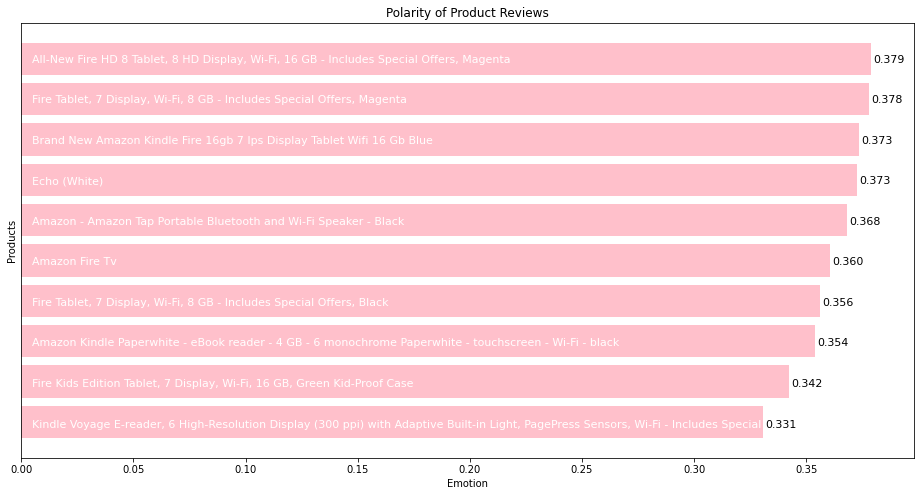

In [33]:
product_polarity=pd.DataFrame(textdata.groupby('name')['emotion'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Emotion')
plt.ylabel('Products')
plt.title('Polarity of Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity.index)),product_polarity['emotion'],color='pink')


for bar,product in zip(polarity_graph,product_polarity.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

for bar,polarity in zip(polarity_graph,product_polarity['emotion']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

**Here first few products have good feedback from the viewers whereas last few products depicted in the bar graph have lesser user ratings.** **This helps in understanding the popularity of products through user reviews.**

**Python package textstat is used to calculate statistics from text to determine readability of texts. We can use this to determine if reading time of reviews upvoted as helpful and non-helpful have any impact.**



In [34]:
textcopy['reviews.doRecommend']=textcopy['reviews.doRecommend'].astype(int)
textcopy['reviews.numHelpful']=textcopy['reviews.numHelpful'].astype(int)

In [35]:
#using textstat package

textcopy['reading_time']=textcopy['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews is',textcopy[textcopy['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews is',textcopy[textcopy['reviews.numHelpful']<=1]['reading_time'].mean())


Reading Time of upvoted reviews is 3.696822519083974
Reading Time of not upvoted reviews is 1.8005997496301547


## Previous review was helpful to decide about product